In [23]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np


In [2]:
x,_ = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=42,)
x.shape

(1000, 2)

***
#### Ploting DataPoints using Scatter Plot
***

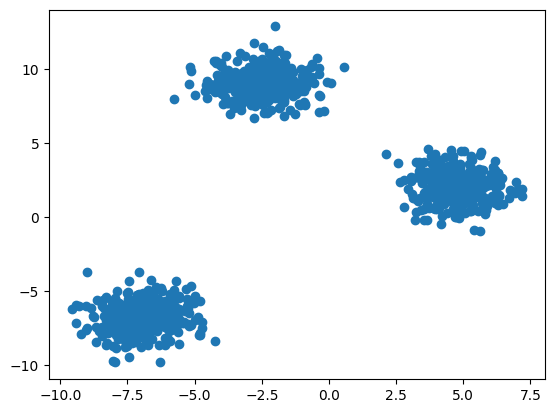

In [3]:
plt.scatter(x[:,0],x[:,1])

***
#### Feature Scaling with Standard Scaler
***

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

***
#### Elbow Method for finding k
***

In [5]:
from sklearn.cluster import KMeans

In [6]:
WCSS = []
for k in range(1,11):
    cluster = KMeans(n_clusters=k)
    cluster.fit(x_scaled)
    WCSS.append(cluster.inertia_)

In [7]:
WCSS

[2000.0000000000011,
 619.8537057059851,
 62.888747146948816,
 54.22652084858885,
 46.852521024467585,
 38.14085934838934,
 35.19997211040075,
 31.953413307265336,
 28.27379662420639,
 26.064645926478473]

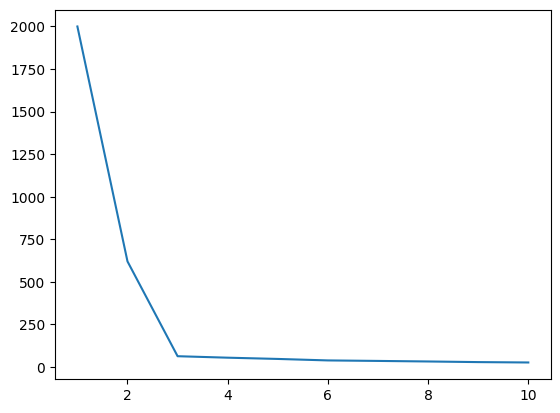

In [8]:
plt.plot(range(1,11),WCSS)

***
#### silhouette analysis on KMeans Clustering
***

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
scores = list()
for k in range(2,11):
    scores.append(silhouette_score(x_scaled,KMeans(n_clusters=k).fit(x_scaled).labels_))

Text(0, 0.5, 'Silhouette Score')

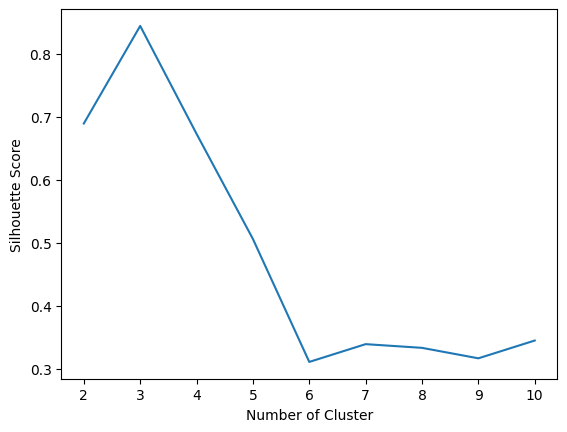

In [11]:
plt.plot(range(2,11),scores)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')

***
#### KMean Cluster with 3 clusters
***

In [12]:
cluster = KMeans(n_clusters=3,init='k-means++')
cluster.fit(x_scaled)
cluster.labels_[1:6]

array([0, 1, 2, 2, 0])

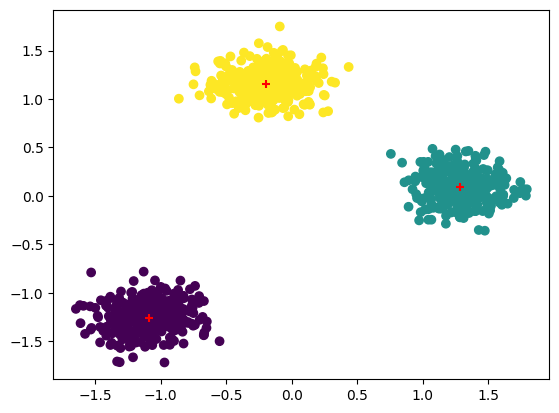

In [21]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=cluster.labels_)
plt.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1],marker="+",c='red')


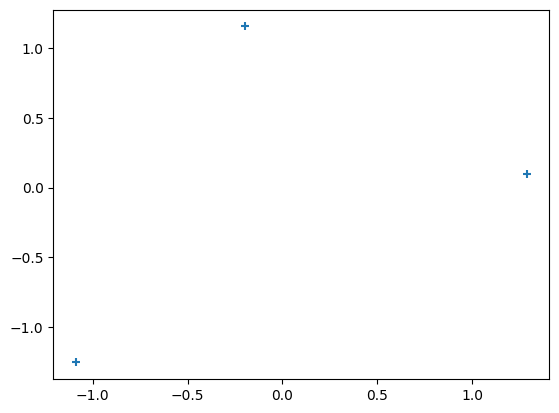

***
#### silhouette score for cross Validation
***

In [14]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_scaled,cluster.labels_)
score

0.8447029034838642

***
***
# <b> Advantages</b>
***

-  Simple and Fast
-  Scalable
-  Easy to Interpret
-  Versatile


***
# <b>Disadvantages </b>
***
- Need to specify K
- Sensitive to initial Centroids
- Poor with Non-Spherical Clusters
- Not Robust to Outliers
- Assumes Equal Cluster Size
- Only Works with Numeric Data